In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from time import process_time 

In [2]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=70)

In [3]:
faces.images.shape

(1288, 62, 47)

In [4]:
images=faces.images

In [5]:
X = faces.data
y = faces.target

In [6]:
X.shape

(1288, 2914)

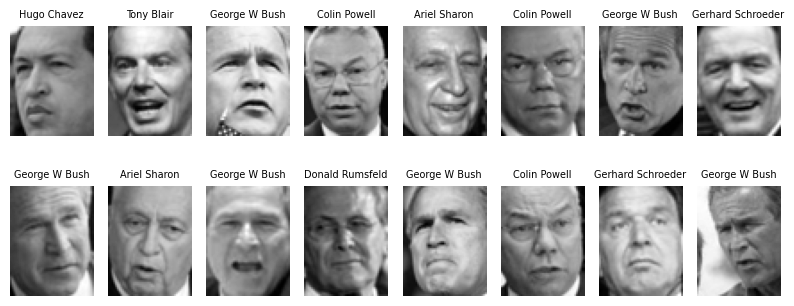

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=8, figsize=(8,5))
ax = ax.flatten()
plt.subplots_adjust(wspace=10, hspace=0.01)
for i in range(16):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_title(faces.target_names[y[i]],fontsize=7)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

## i- Model  Training (without  PCA)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

In [9]:
X_train, X_test, y_train, y_test= train_test_split(X, y , test_size=0.25,random_state=42)

In [10]:
X_train.shape

(966, 2914)

In [11]:
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

t_start = process_time()  
clf.fit(X_train,y_train)
t_stop = process_time()  
acc0=clf.score(X_test,y_test)*100
t0=(t_stop-t_start)

In [12]:
print("Accuracy:",acc0,"%")

Accuracy: 77.01863354037268 %


In [13]:
print("Training time in seconds:",t0)  

Training time in seconds: 0.6875


## ii -  Model Training  using (with PCA)

In [14]:
from sklearn.decomposition import PCA

In [15]:
x = faces.data
y = faces.target

In [16]:
x_train, x_test, y_train, y_test= train_test_split(x, y , test_size=0.25,random_state=42)

## When k=150

In [17]:
k=150
pca =PCA(n_components=k)
pca.fit(x_train)

PCA(n_components=150)

In [18]:
X_train_pca=pca.transform(x_train)
X_test_pca=pca.transform(x_test)

In [19]:
X_train_pca.shape

(966, 150)

In [20]:
clf1 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
t1_start = process_time()  
clf1.fit(X_train_pca,y_train)
t1_stop = process_time()  
acc1=clf1.score(X_test_pca,y_test)*100
t1=(t1_stop-t1_start)

In [21]:
print("Accuracy:",acc1,"%")
print("Training time in seconds:",t1)  

Accuracy: 80.12422360248446 %
Training time in seconds: 0.265625


K= 150


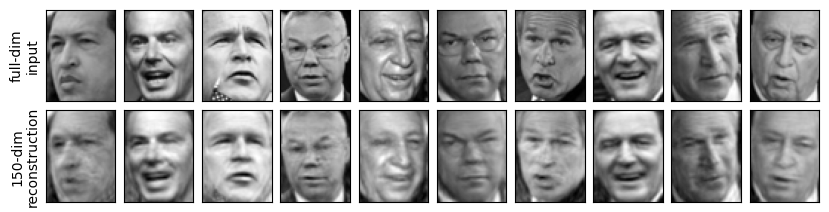

In [22]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
print("K=",k)
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

# k=100

In [23]:
k=100
pca =PCA(n_components=k)
pca.fit(x_train)

PCA(n_components=100)

In [24]:
X_train_pca=pca.transform(x_train)
X_test_pca=pca.transform(x_test)

In [25]:
X_train_pca.shape

(966, 100)

In [26]:
X_test_pca.shape

(322, 100)

In [27]:
clf2 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
t2_start = process_time()  
clf2.fit(X_train_pca,y_train)
t2_stop = process_time()  
acc2=clf2.score(X_test_pca,y_test)*100
t2=t2_stop-t2_start

In [28]:
print("Accuracy:",acc2,"%")
print("Training time in seconds:",t2)  

Accuracy: 83.22981366459628 %
Training time in seconds: 0.25


K= 100


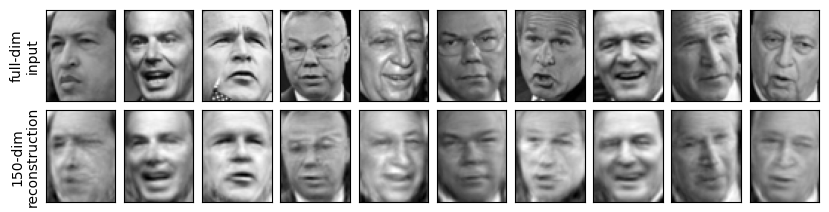

In [29]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
# Plot the results
print("K=",k)
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

## K=50

In [30]:
k=50
pca =PCA(n_components=k)
pca.fit(x_train)

PCA(n_components=50)

In [31]:
X_train_pca=pca.transform(x_train)
X_test_pca=pca.transform(x_test)

In [32]:
X_train_pca.shape

(966, 50)

In [33]:
clf3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))

t3_start = process_time()  
clf3.fit(X_train_pca,y_train)
t3_stop = process_time()  
acc3=clf3.score(X_test_pca,y_test)*100
t3=t3_stop-t3_start

In [34]:
print("Accuracy:",acc3,"%")
print("Training time in seconds:",t3)  

Accuracy: 83.54037267080744 %
Training time in seconds: 0.109375


K= 50


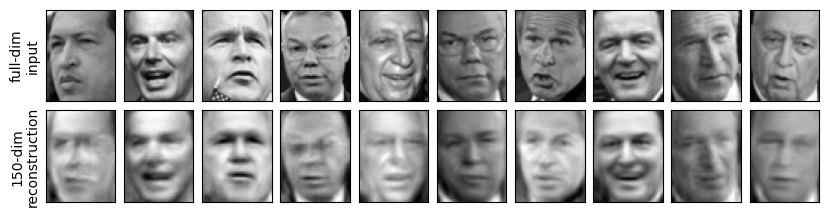

In [35]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
# Plot the results
print("K=",k)
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

## k=20

In [36]:
k=20
pca =PCA(n_components=k)
pca.fit(x_train)

PCA(n_components=20)

In [37]:
X_train_pca=pca.transform(x_train)
X_test_pca=pca.transform(x_test)

In [38]:
X_train_pca.shape

(966, 20)

In [39]:
clf4 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
t4_start = process_time()  
clf4.fit(X_train_pca,y_train)
t4_stop = process_time()  
acc4=clf4.score(X_test_pca,y_test)*100
t4=t4_stop-t4_start

In [40]:
print("Accuracy:",acc4,"%")
print("Training time in seconds:",t4)  

Accuracy: 70.80745341614907 %
Training time in seconds: 0.078125


K= 20


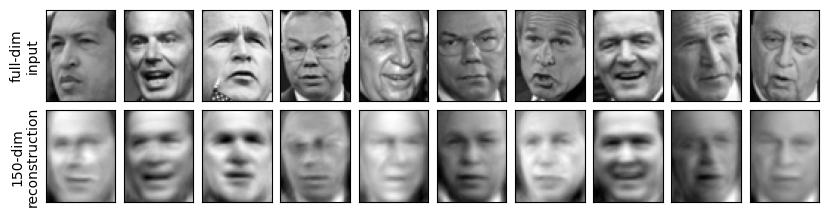

In [41]:
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)
# Plot the results
print("K=",k)
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

# IN SUMMARY:

In [42]:
data=np.array([[None,acc0,t0],
               [150,acc1,t1],
               [100,acc2,t2],
               [50,acc3,t3],
               [20,acc4,t4]])

summary_table = pd.DataFrame(columns=(['K','Accuracy','Time(s)']),
                    data=data)
summary_table

,K,Accuracy,Time(s)
0,None,77.018634,0.6875
1,150,80.124224,0.265625
2,100,83.229814,0.25
3,50,83.540373,0.109375
4,20,70.807453,0.078125


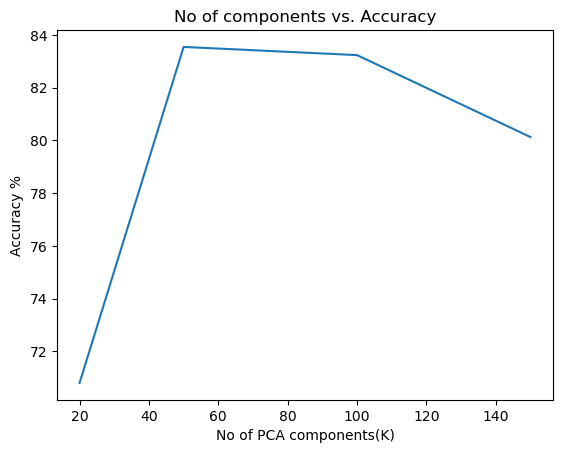

In [43]:
import seaborn as sns
sns.lineplot(x=summary_table['K'],y=summary_table['Accuracy'])
plt.xlabel('No of PCA components(K)')
plt.ylabel('Accuracy %')
plt.title('No of components vs. Accuracy');

***It seems that K being approximately 50 is an optimal choice of components that provides a good balance between capturing enough information and avoiding overfitting with less time.***